In [345]:
from IPython.core.display import HTML
HTML("""
<style>
    /* Set all text to Times New Roman */
    body, p, div, h1, h2, h3, h4, h5, h6, li, span, td, th, input, select, textarea, button, option {
        font-family: "Times New Roman", Times, serif;
    }
</style>
""")

# MCS Grapher
<span style="font-family:Times New Roman; font-size: 12pt;"> This Sheet will take us through a quick graphing tool that takes an MCS sheet and some whole rock data and quickly plots them. This will be helpful so that we don't need to take any data out of an MCS sheet, we can just use it straight from the output sheet! Whoo! There are 3 general steps. 1. im port all the packages we need, 2. import the dtat we want tu use, and 3. plot the data. Those are the general steps, which are marked with large, bolded text, and all the micro steps taken to achieve those steps are explained with text that has a # preceeding the words, followed by the code! Hopefully that makes it easier to read through the notebook for people who haven't seen one before!
</span>

In [ ]:
# For example, text that explains what the code does looks like this.

## Step 1. Bring in packages downloaded. 
     Different packages allow different functionality within the Jupyter Notebook. The main packages we will import here are listed below (click on each name for more information). And there are a few more imported to make plotting and calculations easier!

         * <a href="numpy.org/doc/stable/index.html" target="_blank">Numpy</a> 
      
         * [Pandas](pandas.pydata.org/docs/) 
      
         * [Matplotlib](matplotlib.org/stable/users/index)
      

In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import floor, log10
import math
import matplotlib.ticker as ticker

## Step 2. Read in an Excel sheet into a pandas DataFrames 
      This basically allows us to store the data as variables in the Jupyter Notebook in a more workable format using the pandas package.

      Begin by typing 'df = pd.read_excel("file_to_read.xlsx", sheet_name='file_sheet_name')'

      file_to_read.xlsx is the MCS output file that you are wanting to use and since the output data in an MCS sheet is stored in the 2nd tab (since the first tab is a repeat of the input parameters)

      We also need to specify that the Jupyter Notebook grabs the data from the RunSummary tab, so sheet_name='RunSummary'.

In [347]:
#Can replace this spreadsheet name with any MCS run and should automatically work when you click through the notebook!

df = pd.read_excel("1kb_500R1_gab.XLSX", sheet_name='RunSummary')

In [348]:
# We can double check to make sure we are grabbing the data from the correct Excel spreadsheet tab by using the 'df.head()' command.
# This will show us the first few rows and columns of the data being used.

df.head()

,Unnamed: 0,Melts Run Mode,Magma Chamber Process,Magma Temperature (°C),Wallrock Temperature (°C),Recharge Magma Temperature (°C) (T of recharge magma when recharge event occurs),Total Magma Chamber Mass (grams ),Magma Liquid Mass (grams),Magma: Total Incremental Mass of Crystals (Cumulates) removed as Cumulates (grams),Magma: Total Cumulative Mass of Crystals (Cumulates) removed as Cumulates (grams),...,Wallrock Melt MnO (wt. %),Wallrock Melt MgO (wt. %),Wallrock Melt NiO (wt. %),Wallrock Melt CoO (wt. %),Wallrock Melt CaO (wt. %),Wallrock Melt Na2O (wt. %),Wallrock Melt K2O (wt. %),Wallrock Melt P2O5 (wt. %),Wallrock Melt H2O (wt. %),Wallrock Melt CO2 (wt. %)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Numbers this row; System use only.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NO WR INFO TRACKED IN FC OR RFC ONLY MCS,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,MagmaFindLiquidus,M LIQUIDUS T,1233.984375,NaN,NaN,100.0,100.000000,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,MagmaEquilibrateB,FC,1233.984375,NaN,NaN,100.0,99.988526,0.011474,0.011474,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


      This looks like the correct MCS tab (the RunSummary tab), so we are good to go! Whoo!

In [349]:
#This rounds the data so that there aren't as many sig figs.

def smarter_round(sig):
    def rounder(x):
        offset = sig - floor(log10(abs(x)))
        initial_result = round(x, offset)
        if str(initial_result)[-1] == '5' and initial_result == x:
            return round(x, offset - 2)
        else:
            return round(x, offset - 1)
    return rounder

In [350]:
#This picks out only the columns that start with 'Magma Melt'.

substring = 'Magma Melt'
column_names = []
for col_name in df.columns:
    if substring in col_name[0:10]:
        column_names.append(col_name)

new_df = df[column_names].dropna()

for col in new_df.columns:
    if ((new_df[col] == 0.0).all()):
        pass
    else:
        new_df[col] = new_df[col].apply(smarter_round(4))

In [351]:
# Add in a New Column for total FeO* (This seems to automatically add in this column to all df so if its pasted again below, it freaksout and throws an "this already exists error")

new_df.insert(loc=5, column='Magma Melt FeO* (wt. %)', value=df['Magma Melt FeO (wt. %)'] + (0.8899 * df['Magma Melt Fe2O3 (wt. %)']))

In [352]:
new_df

,Magma Melt SiO2 (wt. %),Magma Melt TiO2 (wt. %),Magma Melt Al2O3 (wt. %),Magma Melt Fe2O3 (wt. %),Magma Melt Cr2O3 (wt. %),Magma Melt FeO* (wt. %),Magma Melt FeO (wt. %),Magma Melt MnO (wt. %),Magma Melt MgO (wt. %),Magma Melt NiO (wt. %),Magma Melt CoO (wt. %),Magma Melt CaO (wt. %),Magma Melt Na2O (wt. %),Magma Melt K2O (wt. %),Magma Melt P2O5 (wt. %),Magma Melt H2O (wt. %),Magma Melt CO2 (wt. %)
3,48.04,1.809,13.86,1.7740,0.0,11.478094,9.899,0.1848,10.180,0.0,0.0,10.200,2.352,0.4724,0.2231,1.0050,0.0
4,48.04,1.809,13.86,1.7740,0.0,11.477829,9.899,0.1848,10.180,0.0,0.0,10.200,2.352,0.4725,0.2231,1.0050,0.0
5,48.08,1.819,13.93,1.7830,0.0,11.464856,9.878,0.1844,9.997,0.0,0.0,10.250,2.364,0.4749,0.2243,1.0100,0.0
6,48.12,1.828,14.01,1.7920,0.0,11.450960,9.856,0.1841,9.817,0.0,0.0,10.300,2.377,0.4773,0.2254,1.0160,0.0
7,48.17,1.837,14.08,1.8020,0.0,11.436146,9.833,0.1837,9.638,0.0,0.0,10.350,2.389,0.4798,0.2266,1.0210,0.0
8,48.21,1.846,14.15,1.8110,0.0,11.420416,9.809,0.1833,9.461,0.0,0.0,10.400,2.401,0.4822,0.2277,1.0260,0.0
9,48.25,1.856,14.22,1.8200,0.0,11.403774,9.785,0.1829,9.287,0.0,0.0,10.450,2.412,0.4845,0.2288,1.0310,0.0
10,48.29,1.865,14.29,1.8280,0.0,11.386220,9.759,0.1825,9.115,0.0,0.0,10.500,2.424,0.4869,0.2300,1.0360,0.0
12,48.08,1.818,13.93,1.7830,0.0,11.463172,9.877,0.1844,10.010,0.0,0.0,10.250,2.364,0.4748,0.2242,1.0100,0.0
13,48.08,1.818,13.93,1.7830,0.0,11.463172,9.877,0.1844,10.010,0.0,0.0,10.250,2.364,0.4748,0.2242,1.0100,0.0


In [367]:
# Import Whole Rock Data (Should have maybe been the first df but I didn't want to re-do it now, but I will later)
# Can replace this spreadsheet name with anywhole rock data spreadsheet (that is formatted like this) and should automatically work when you click through the notebook!

df2 = pd.read_excel("for_jupyter.xlsx")
new_df2 = df2.round(decimals=2)
new_df2

,Magma Melt SiO2 (wt. %),Magma Melt TiO2 (wt. %),Magma Melt Al2O3 (wt. %),Magma Melt Fe2O3 (wt. %),Magma Melt Cr2O3 (wt. %),Magma Melt FeO* (wt. %),Magma Melt FeO (wt. %),Magma Melt MnO (wt. %),Magma Melt MgO (wt. %),Magma Melt NiO (wt. %),Magma Melt CoO (wt. %),Magma Melt CaO (wt. %),Magma Melt Na2O (wt. %),Magma Melt K2O (wt. %),Magma Melt P2O5 (wt. %),Magma Melt H2O (wt. %),Magma Melt CO2 (wt. %)
0,48.83,2.03,15.16,0,0,10.95,0,0.18,8.58,0,0,11.36,2.33,0.36,0.21,0,0
1,48.82,1.72,13.39,0,0,11.34,0,0.19,12.02,0,0,9.60,2.14,0.57,0.21,0,0
2,49.29,1.63,14.36,0,0,10.68,0,0.18,10.74,0,0,10.37,2.22,0.37,0.17,0,0
3,50.21,1.73,15.06,0,0,10.12,0,0.18,8.94,0,0,10.82,2.36,0.39,0.19,0,0
4,49.61,1.83,14.87,0,0,10.21,0,0.17,9.87,0,0,10.24,2.45,0.53,0.23,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,49.04,2.98,15.20,0,0,13.51,0,0.21,5.43,0,0,8.37,3.36,1.33,0.56,0,0
125,50.58,2.76,16.25,0,0,12.74,0,0.18,3.32,0,0,8.47,3.49,1.55,0.65,0,0
126,49.54,2.86,14.76,0,0,13.78,0,0.21,5.07,0,0,8.45,3.41,1.39,0.53,0,0
127,49.36,2.82,15.01,0,0,13.44,0,0.21,5.37,0,0,8.38,3.43,1.43,0.57,0,0


In [355]:
# Import another MCS spreadsheet to plot. 
# Can replace this spreadsheet name with any MCS run and should automatically work when you click through the notebook!

In [356]:
df3 = pd.read_excel('highplag_300R2.XLSX', sheet_name='RunSummary')
df3 = df3.round(decimals=2)
df3.head()

,Unnamed: 0,Melts Run Mode,Magma Chamber Process,Magma Temperature (°C),Wallrock Temperature (°C),Recharge Magma Temperature (°C) (T of recharge magma when recharge event occurs),Total Magma Chamber Mass (grams ),Magma Liquid Mass (grams),Magma: Total Incremental Mass of Crystals (Cumulates) removed as Cumulates (grams),Magma: Total Cumulative Mass of Crystals (Cumulates) removed as Cumulates (grams),...,Wallrock Melt MnO (wt. %),Wallrock Melt MgO (wt. %),Wallrock Melt NiO (wt. %),Wallrock Melt CoO (wt. %),Wallrock Melt CaO (wt. %),Wallrock Melt Na2O (wt. %),Wallrock Melt K2O (wt. %),Wallrock Melt P2O5 (wt. %),Wallrock Melt H2O (wt. %),Wallrock Melt CO2 (wt. %)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Numbers this row; System use only.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NO WR INFO TRACKED IN FC OR RFC ONLY MCS,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,MagmaFindLiquidus,M LIQUIDUS T,1233.98,NaN,NaN,100.0,100.00,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,MagmaEquilibrateB,FC,1233.98,NaN,NaN,100.0,99.99,0.01,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [357]:
def smarter_round(sig):
    def rounder(x):
        offset = sig - floor(log10(abs(x)))
        initial_result = round(x, offset)
        if str(initial_result)[-1] == '5' and initial_result == x:
            return round(x, offset - 2)
        else:
            return round(x, offset - 1)
    return rounder

In [358]:
substring = 'Magma Melt'
column_names = []
for col_name in df.columns:
    if substring in col_name[0:10]:
        column_names.append(col_name)

df3 = df[column_names].dropna()

for col in df3.columns:
    if ((df3[col] == 0.0).all()):
        pass
    else:
        df3[col] = df3[col].apply(smarter_round(4))

In [359]:
# This just renames the df so I can plot the same number of columns across all df
df3 = new_df3

new_df3

,Magma Melt SiO2 (wt. %),Magma Melt TiO2 (wt. %),Magma Melt Al2O3 (wt. %),Magma Melt Fe2O3 (wt. %),Magma Melt Cr2O3 (wt. %),Magma Melt FeO* (wt. %),Magma Melt FeO (wt. %),Magma Melt MnO (wt. %),Magma Melt MgO (wt. %),Magma Melt NiO (wt. %),Magma Melt CoO (wt. %),Magma Melt CaO (wt. %),Magma Melt Na2O (wt. %),Magma Melt K2O (wt. %),Magma Melt P2O5 (wt. %),Magma Melt H2O (wt. %),Magma Melt CO2 (wt. %)
3,48.04,1.809,13.86,1.7740,0.0,11.478094,9.899,0.1848,10.180,0.0,0.0,10.200,2.352,0.4724,0.2231,1.0050,0.0
4,48.04,1.809,13.86,1.7740,0.0,11.477829,9.899,0.1848,10.180,0.0,0.0,10.200,2.352,0.4725,0.2231,1.0050,0.0
5,48.08,1.819,13.93,1.7830,0.0,11.464856,9.878,0.1844,9.997,0.0,0.0,10.250,2.364,0.4749,0.2243,1.0100,0.0
6,48.12,1.828,14.01,1.7920,0.0,11.450960,9.856,0.1841,9.817,0.0,0.0,10.300,2.377,0.4773,0.2254,1.0160,0.0
7,48.17,1.837,14.08,1.8020,0.0,11.436146,9.833,0.1837,9.638,0.0,0.0,10.350,2.389,0.4798,0.2266,1.0210,0.0
8,48.21,1.846,14.15,1.8110,0.0,11.420416,9.809,0.1833,9.461,0.0,0.0,10.400,2.401,0.4822,0.2277,1.0260,0.0
9,48.25,1.856,14.22,1.8200,0.0,11.403774,9.785,0.1829,9.287,0.0,0.0,10.450,2.412,0.4845,0.2288,1.0310,0.0
10,48.29,1.865,14.29,1.8280,0.0,11.386220,9.759,0.1825,9.115,0.0,0.0,10.500,2.424,0.4869,0.2300,1.0360,0.0
12,48.16,1.836,14.07,1.8010,0.0,11.432879,9.830,0.1837,9.658,0.0,0.0,10.340,2.387,0.4795,0.2265,1.0200,0.0
13,48.16,1.836,14.07,1.8010,0.0,11.432879,9.830,0.1837,9.658,0.0,0.0,10.340,2.387,0.4795,0.2265,1.0200,0.0


## Step 3. Plot the Data!!!
     

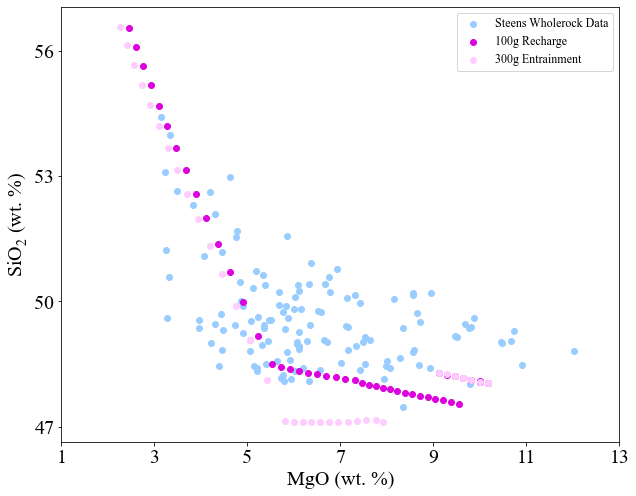

In [360]:
# Specify dataframe data (not be necessary, but helps me keep track of what they were called)
df
df2
new_df3

# Create a figure and subplots
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the second dataset on the same subplot (This one First so that it is the background dataset)
ax.scatter(df2['Magma Melt MgO (wt. %)'], df2['Magma Melt SiO2 (wt. %)'], color='#99ccff', label='Steens Wholerock Data')

# Plot the first dataset
ax.scatter(df['Magma Melt MgO (wt. %)'], df['Magma Melt SiO2 (wt. %)'], color='#DD02DD', label='100g Recharge')

# Plot the third dataset
ax.scatter(new_df3['Magma Melt MgO (wt. %)'], new_df3['Magma Melt SiO2 (wt. %)'], color='#ffccff', label='300g Entrainment')

# Set the x and y-axis labels
ax.set_xlabel('MgO (wt. %)', fontsize=20, fontname='Times New Roman')
ax.set_ylabel('SiO$\mathregular{_2}$ (wt. %)', fontsize=20, fontname='Times New Roman')

# Set the tick label font size and font family
ax.tick_params(axis='both', labelsize=20)
for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")

# Set the ticks for the x and y axes
xticks = [1, 3, 5, 7, 9, 11, 13]
yticks = [47,50, 53, 56]
ax.set_xticks(xticks)
ax.set_yticks(yticks) 

# Calculate the tick locations using numpy.linspace
x_ticks = np.linspace(x_start, x_end, num=5)

# Set the number of significant digits for the x-axis tick labels
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    
# Add a legend
ax.legend(prop={'family': 'Times New Roman', 'size': 12})

# Display the plot
plt.show()

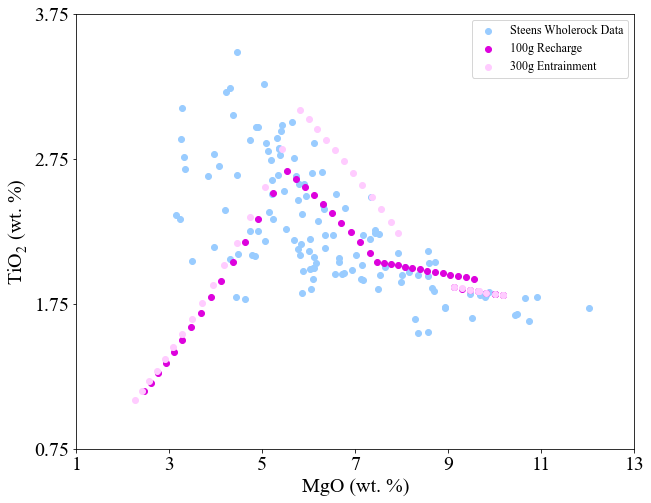

In [361]:
# Specify dataframe data (might not be necessary)
df
df2

# Create a figure and subplots
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the second dataset on the same subplot (This one First so that it is the background dataset)
ax.scatter(df2['Magma Melt MgO (wt. %)'], df2['Magma Melt TiO2 (wt. %)'], color='#99ccff', label='Steens Wholerock Data')

# Plot the first dataset
ax.scatter(df['Magma Melt MgO (wt. %)'], df['Magma Melt TiO2 (wt. %)'], color='#DD02DD', label='100g Recharge')

#Plot the third dataset
ax.scatter(new_df3['Magma Melt MgO (wt. %)'], new_df3['Magma Melt TiO2 (wt. %)'], color='#ffccff', label='300g Entrainment')

# Set the x and y-axis labels
ax.set_xlabel('MgO (wt. %)', fontsize=20, fontname='Times New Roman')
ax.set_ylabel('TiO$\mathregular{_2}$ (wt. %)', fontsize=20, fontname='Times New Roman')

# Set the tick label font size and font family
ax.tick_params(axis='both', labelsize=20)
for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")

# Set the ticks for the x and y axes
xticks = [1, 3, 5, 7, 9, 11, 13]
yticks = [0.75,1.75, 2.75, 3.75]
ax.set_xticks(xticks)
ax.set_yticks(yticks)  
    
# Set the x and y-axis bounds
ax.set_xlim(1, 13)
ax.set_ylim(0.75, 3.75)

# Set the number of significant digits for the x-axis tick labels
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    
# Add a legend
ax.legend(prop={'family': 'Times New Roman', 'size': 12})

# Display the plot
plt.show()

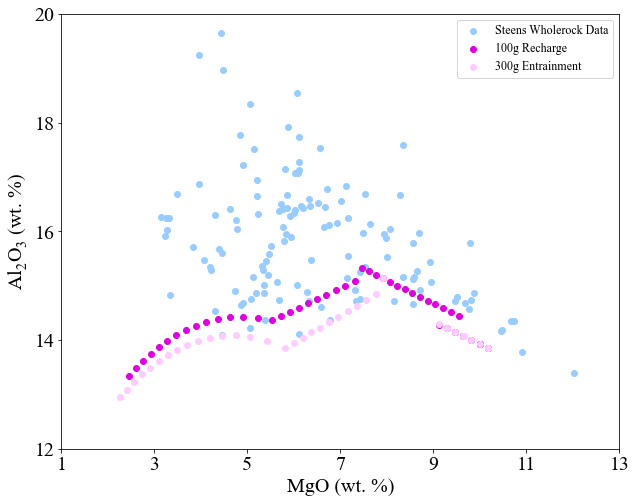

In [362]:
#Specify dataframe data (might not be necessary)
df
df2

# Create a figure and subplots
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the second dataset on the same subplot (This one First so that it is the background dataset)
ax.scatter(df2['Magma Melt MgO (wt. %)'], df2['Magma Melt Al2O3 (wt. %)'], color='#99ccff', label='Steens Wholerock Data')

# Plot the first dataset
ax.scatter(df['Magma Melt MgO (wt. %)'], df['Magma Melt Al2O3 (wt. %)'], color='#DD02DD', label='100g Recharge')

#Plot the third dataset
ax.scatter(new_df3['Magma Melt MgO (wt. %)'], new_df3['Magma Melt Al2O3 (wt. %)'], color='#ffccff', label='300g Entrainment')

# Set the x and y-axis labels
ax.set_xlabel('MgO (wt. %)', fontsize=20, fontname='Times New Roman')
ax.set_ylabel('Al$\mathregular{_2}$O$\mathregular{_3}$ (wt. %)', fontsize=20, fontname='Times New Roman')

# Set the tick label font size and font family
ax.tick_params(axis='both', labelsize=20)
for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")

# Set the ticks for the x and y axes
xticks = [1, 3, 5, 7, 9, 11, 13]
yticks = [12, 14, 16, 18, 20]
ax.set_xticks(xticks)
ax.set_yticks(yticks)  
    
# Set the x and y-axis bounds
ax.set_xlim(1, 13)
ax.set_ylim(12, 20)

# Set the number of significant digits for the x-axis tick labels
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    
# Add a legend
ax.legend(prop={'family': 'Times New Roman', 'size': 12})

# Display the plot
plt.show()

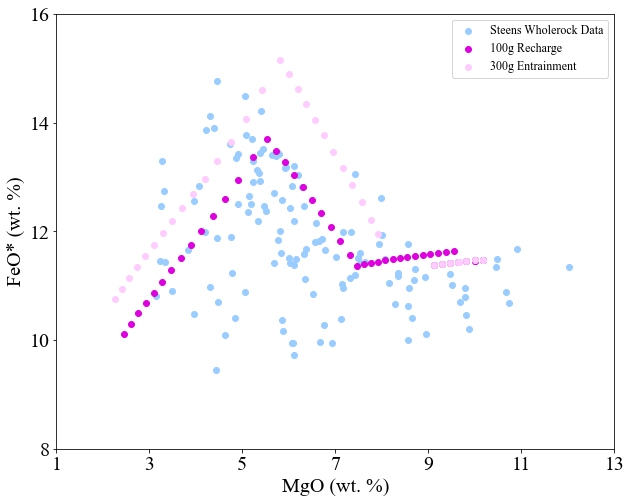

In [363]:
#Specify dataframe data (might not be necessary)
new_df
df2
new_df3

# Create a figure and subplots
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the second dataset on the same subplot (This one First so that it is the background dataset)
ax.scatter(df2['Magma Melt MgO (wt. %)'], df2['Magma Melt FeO* (wt. %)'], color='#99ccff', label='Steens Wholerock Data')

# Plot the first dataset
ax.scatter(new_df['Magma Melt MgO (wt. %)'], new_df['Magma Melt FeO* (wt. %)'], color='#DD02DD', label='100g Recharge')

#Plot the third dataset
ax.scatter(new_df3['Magma Melt MgO (wt. %)'], new_df3['Magma Melt FeO* (wt. %)'], color='#ffccff', label='300g Entrainment')

# Set the x and y-axis labels
ax.set_xlabel('MgO (wt. %)', fontsize=20, fontname='Times New Roman')
ax.set_ylabel('FeO* (wt. %)', fontsize=20, fontname='Times New Roman')

# Set the tick label font size and font family
ax.tick_params(axis='both', labelsize=20)
for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")

# Set the ticks for the x and y axes
xticks = [1, 3, 5, 7, 9, 11, 13]
yticks = [8, 10, 12, 14, 16]
ax.set_xticks(xticks)
ax.set_yticks(yticks)  
    
# Set the x and y-axis bounds
ax.set_xlim(1, 13)
ax.set_ylim(8, 16)

# Set the number of significant digits for the x-axis tick labels
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    
# Add a legend
ax.legend(prop={'family': 'Times New Roman', 'size': 12})

# Display the plot
plt.show()

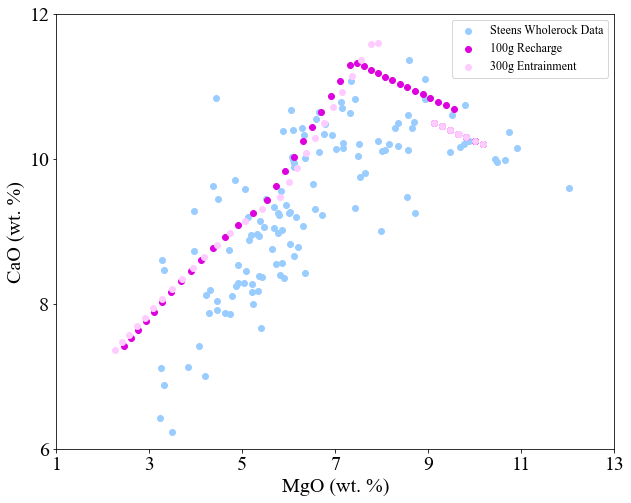

In [364]:
#Specify dataframe data (might not be necessary)
new_df
df2

# Create a figure and subplots
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the second dataset on the same subplot (This one First so that it is the background dataset)
ax.scatter(df2['Magma Melt MgO (wt. %)'], df2['Magma Melt  CaO (wt. %)'], color='#99ccff', label='Steens Wholerock Data')

# Plot the first dataset
ax.scatter(new_df['Magma Melt MgO (wt. %)'], new_df['Magma Melt  CaO (wt. %)'], color='#DD02DD', label='100g Recharge')

#Plot the third dataset
ax.scatter(new_df3['Magma Melt MgO (wt. %)'], new_df3['Magma Melt  CaO (wt. %)'], color='#ffccff', label='300g Entrainment')

# Set the x and y-axis labels
ax.set_xlabel('MgO (wt. %)', fontsize=20, fontname='Times New Roman')
ax.set_ylabel('CaO (wt. %)', fontsize=20, fontname='Times New Roman')

# Set the tick label font size and font family
ax.tick_params(axis='both', labelsize=20)
for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")

# Set the ticks for the x and y axes
xticks = [1, 3, 5, 7, 9, 11, 13]
yticks = [6, 8, 10, 12]
ax.set_xticks(xticks)
ax.set_yticks(yticks)  
    
# Set the x and y-axis bounds
ax.set_xlim(1, 13)
ax.set_ylim(6, 12)

# Set the number of significant digits for the x-axis tick labels
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    
# Add a legend
ax.legend(prop={'family': 'Times New Roman', 'size': 12})

# Display the plot
plt.show()

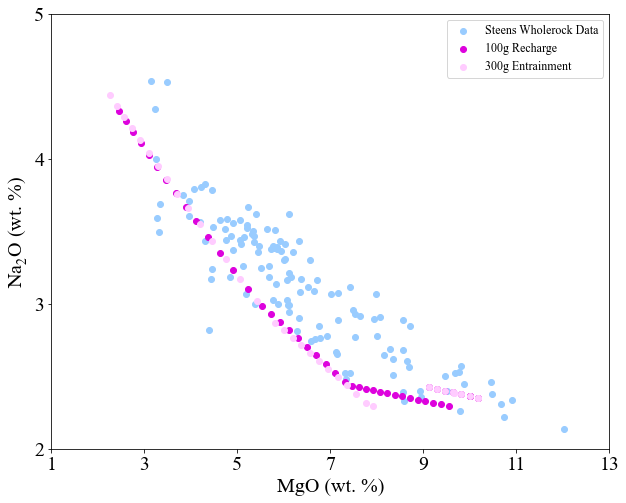

In [365]:
#Specify dataframe data (might not be necessary)
df
df2

# Create a figure and subplots
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the second dataset on the same subplot (This one First so that it is the background dataset)
ax.scatter(df2['Magma Melt MgO (wt. %)'], df2['Magma Melt Na2O (wt. %)'], color='#99ccff', label='Steens Wholerock Data')

# Plot the first dataset
ax.scatter(df['Magma Melt MgO (wt. %)'], df['Magma Melt Na2O (wt. %)'], color='#DD02DD', label='100g Recharge')

#Plot the third dataset
ax.scatter(new_df3['Magma Melt MgO (wt. %)'], new_df3['Magma Melt Na2O (wt. %)'], color='#ffccff', label='300g Entrainment')

# Set the x and y-axis labels
ax.set_xlabel('MgO (wt. %)', fontsize=20, fontname='Times New Roman')
ax.set_ylabel('Na$\mathregular{_2}$O (wt. %)', fontsize=20, fontname='Times New Roman')

# Set the tick label font size and font family
ax.tick_params(axis='both', labelsize=20)
for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")

# Set the ticks for the x and y axes
xticks = [1, 3, 5, 7, 9, 11, 13]
yticks = [2, 3, 4, 5]
ax.set_xticks(xticks)
ax.set_yticks(yticks)  
    
# Set the x and y-axis bounds
ax.set_xlim(1, 13)
ax.set_ylim(2, 5)

# Set the number of significant digits for the x-axis tick labels
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    
# Add a legend
ax.legend(prop={'family': 'Times New Roman', 'size': 12})

# Display the plot
plt.show()

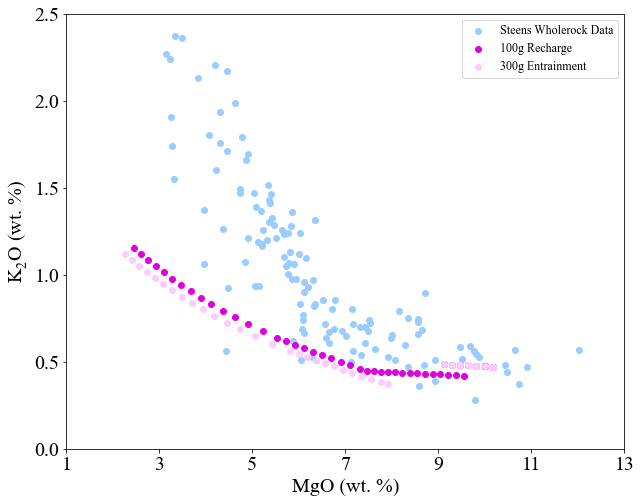

In [366]:
#Specify dataframe data (might not be necessary)
df
df2

# Create a figure and subplots
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the second dataset on the same subplot (This one First so that it is the background dataset)
ax.scatter(df2['Magma Melt MgO (wt. %)'], df2['Magma Melt K2O (wt. %)'], color='#99ccff', label='Steens Wholerock Data')

# Plot the first dataset
ax.scatter(df['Magma Melt MgO (wt. %)'], df['Magma Melt K2O (wt. %)'], color='#DD02DD', label='100g Recharge')

#Plot the third dataset
ax.scatter(new_df3['Magma Melt MgO (wt. %)'], new_df3['Magma Melt K2O (wt. %)'], color='#ffccff', label='300g Entrainment')

# Set the x and y-axis labels
ax.set_xlabel('MgO (wt. %)', fontsize=20, fontname='Times New Roman')
ax.set_ylabel('K$\mathregular{_2}$O (wt. %)', fontsize=20, fontname='Times New Roman')

# Set the tick label font size and font family
ax.tick_params(axis='both', labelsize=20)
for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")

# Set the ticks for the x and y axes
xticks = [1, 3, 5, 7, 9, 11, 13]
yticks = [0, 0.5, 1, 1.5, 2.0, 2.5]
ax.set_xticks(xticks)
ax.set_yticks(yticks)  
    
# Set the x and y-axis bounds
ax.set_xlim(1, 13)
ax.set_ylim(0, 2.5)

# Set the number of significant digits for the x-axis tick labels
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    
# Add a legend
ax.legend(prop={'family': 'Times New Roman', 'size': 12})

# Display the plot
plt.show()